In [1]:
# install various non-standard packages
%pip install -q scipy
%pip install -q librosa
%pip install mir_eval

# just FYI list all packages+libs known in this file. Some of these are installed in the environment.yml file
#import pkg_resources
#for m in pkg_resources.working_set:
#    print(f"{m.project_name}=={m.version}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Using the demon function
from demon import square_law
import numpy as  np


sigma= 500
mu=20000
x= mu + sigma * np.random.randn(2, 4) # 2x4 array gaussian distrib

# from demon
print("x=",x)
print("result=",square_law(x))

x= [[20490.54235075 19305.76687406 20485.84228396 20605.17219511]
 [20594.58910207 20071.90884589 20663.15344658 19977.91737208]]
result= [[-0.70119842]
 [ 0.70119842]]


In [8]:
# Use librosa
# Example from https://librosa.org/doc/latest/auto_examples/plot_spectral_harmonics.html#sphx-glr-auto-examples-plot-spectral-harmonics-py


import matplotlib.pyplot as plt
import mir_eval.sonify
from IPython.display import Audio
import librosa

#this audio file comes pre-packaged witin librosa library
# see this for list of example files to import https://librosa.org/doc/latest/recordings.html

y, sr = librosa.load(librosa.ex('libri2'), duration=15)

Audio(data=y, rate=sr)

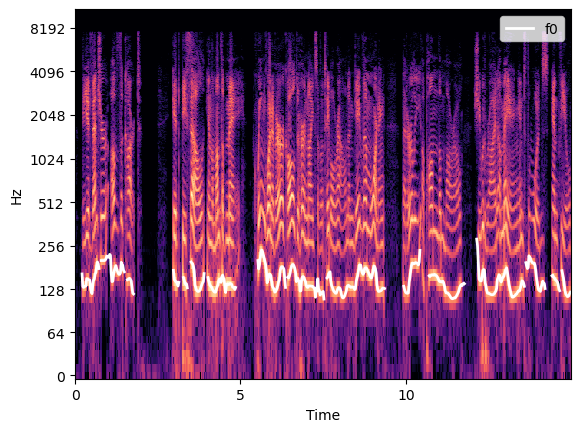

In [9]:
# We can visualize the f0 contour on top of a spectrogram
# this takes ~3min on mybinder vertual PC
f0, voicing, voicing_probability = librosa.pyin(y=y, sr=sr, fmin=50, fmax=300)
S = np.abs(librosa.stft(y))

times = librosa.times_like(S, sr=sr)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, f0, linewidth=2, color='white', label='f0')
ax.legend()


[Text(0, 0.5, 'Harmonics')]

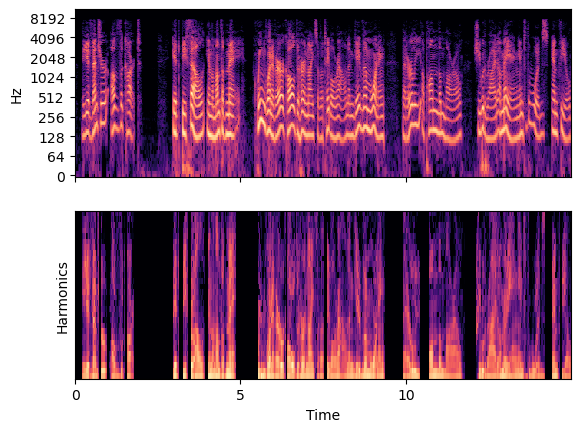

In [10]:
#We can visualize the result harmonic_energy alongside the full spectrogram S to see how they compare to each other
# Let's use the first 30 harmonics: 1, 2, 3, ..., 30
harmonics = np.arange(1, 31)

# And standard Fourier transform frequencies
frequencies = librosa.fft_frequencies(sr=sr)

harmonic_energy = librosa.f0_harmonics(S, f0=f0, harmonics=harmonics, freqs=frequencies)
# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots(nrows=2, sharex=True)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
librosa.display.specshow(librosa.amplitude_to_db(harmonic_energy, ref=np.max),
                         x_axis='time', ax=ax[1])
ax[0].label_outer()
ax[1].set(ylabel='Harmonics')

In [11]:
# f0 takes value np.nan for unvoiced regions, but this isn't
# helpful for synthesis.  We'll use `np.nan_to_num` to replace
# nans with a frequency of 0.
f0_synth = np.nan_to_num(f0)

y_out = np.zeros_like(y)

for i, (factor, energy) in enumerate(zip(harmonics, harmonic_energy)):
    # Mix in a synthesized pitch contour
    y_out = y_out + mir_eval.sonify.pitch_contour(times, f0_synth * factor,
                                                amplitudes=energy,
                                                fs=sr,
                                                length=len(y))

Audio(data=y_out, rate=sr)


In [12]:
# Make a fake f0 contour
f_mono = 110 * np.ones_like(f0)

ymono = np.zeros_like(y)

for i, (factor, energy) in enumerate(zip(harmonics, harmonic_energy)):
    # Use f_mono here instead of f0
    ymono = ymono + mir_eval.sonify.pitch_contour(times, f_mono * factor,
                                                amplitudes=energy,
                                                fs=sr,
                                                length=len(y))

Audio(data=ymono, rate=sr)